In [40]:
!pip install "gymnasium[mujoco]"
!pip install mpi4py


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [41]:
import os
import subprocess
import torch
from matplotlib import pyplot as plt
import gymnasium as gym
import numpy as np
import pandas as pd

In [42]:
env_file = 'model_downloader.py'
env_url = "https://raw.githubusercontent.com/alibaniasad1999/master-thesis/main/Code/Python/utils/model_downloader.py"

if not os.path.isfile(env_file):
    print(f"Downloading {env_file} ...")
    subprocess.run(
        ['wget', '-q', '-O', env_file, env_url],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.DEVNULL
    )
    print(f"{env_file} downloaded.")
else:
    print(f"{env_file} already exists.")

from model_downloader import download_file, download_everything

# Consolidate downloads into a single call (Standard + Zero-Sum assets)
trajectory = download_everything(
    'TBP, ddpg, td3, sac, ppo, zs_ddpg, zs_td3, zs_sac, zs_ppo, '
    'models, td3_models, sac_models, ppo_models, ddpg_models, '
    'zs_models, zs_td3_models, zs_sac_models, zs_ppo_models',
    folder_name=True
)

# Deduplicated imports
from DDPG import DDPG, MLPActorCritic
from Zero_Sum_DDPG import DG_DDPG
from Zero_Sum_DDPG import MLPActorCritic as ZS_MLPActorCritic
from SAC import SAC
from Zero_Sum_SAC import ZS_SAC
from PPO import PPO
from Zero_Sum_PPO import ZS_PPO
from TD3 import TD3
from Zero_Sum_TD3 import ZS_TD3
from utils.run_utils import setup_logger_kwargs
from TBP import ThreeBodyEnv

# Single global device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_downloader.py already exists.
trajectory.csv already exists.
Trajectory head:
   0.87018  -0.059444  0  -0.010472  -0.17514  0.1
0  0.87018  -0.059540  0  -0.010536  -0.17494    0
1  0.87017  -0.059636  0  -0.010600  -0.17474    0
2  0.87017  -0.059732  0  -0.010664  -0.17454    0
3  0.87016  -0.059828  0  -0.010728  -0.17434    0
4  0.87015  -0.059924  0  -0.010793  -0.17414    0
Data shape: (9999, 6)
TBP.py already exists.
DDPG.py already exists.
Zero_Sum_DDPG.py already exists.
Directory 'model_DDPG' already exists and is not empty.
model_DDPG/actor_cuda.pth already exists.
model_DDPG/q_cuda.pth already exists.
Directory 'model_DDPG' already exists and is not empty.
model_DDPG/actor_cuda.pth already exists.
model_DDPG/q_cuda.pth already exists.
Directory 'model_zs_DDPG' already exists and is not empty.
model_zs_DDPG/actor_cuda.pth already exists.
model_zs_DDPG/q_cuda.pth already exists.
model_zs_DDPG/q_2_cuda.pth already exists.
model_zs_DDPG/actor_2_cuda.pth already exists.
P

## DDPG

Logging data to /Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/All_in_one/actuator_disturbance/data/ddpg/ddpg_s0/progress.txt
Saving config:

{
    "ac_kwargs_":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "act_dim":	2,
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	1024,
    "device_":	"cpu",
    "env_fn":	"make_env",
    "epochs_":	50,
    "exp_name":	"ddpg",
    "gamma_":	0.99,
    "logger_kwargs_":	{
        "exp_name":	"ddpg",
        "output_dir":	"/Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/All_in_one/actuator_disturbance/data/ddpg/ddpg_s0"
    },
    "max_ep_len":	6000,
    "num_test_episodes":	10,
    "obs_dim":	[
        4
    ],
    "p":	"Parameter containing:\ntensor([-0.1749])",
    "pi_lr":	0.001,
    "polyak":	0.995,
    "q_lr":	0.001,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed_":	0,
    "self":	{
        "<DDPG.DDPG object at 0x16842c490>":	

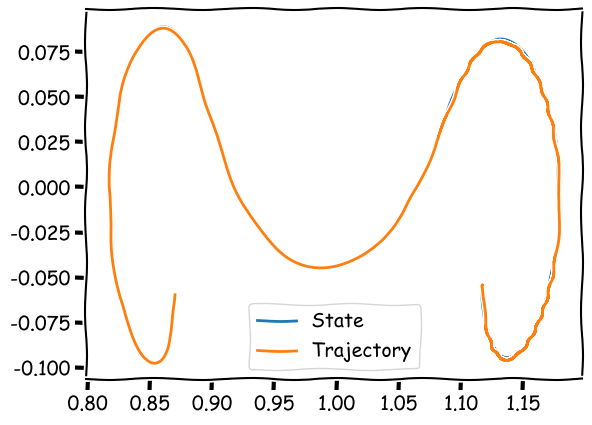

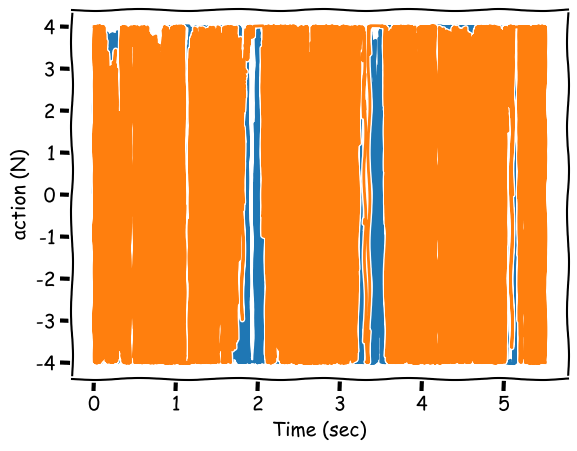

In [43]:
# Common hyperparameters and settings
hid = 32
l = 2
seed = 0
epochs = 50
exp_name = 'ddpg'
steps_per_epoch = 30000

# Helper function to create the environment
def make_env(error_range=0.01, final_range=0.001):
    return ThreeBodyEnv(trajectory, error_range=error_range, final_range=final_range)

# Use per-algorithm network sizes to avoid accidental overrides
ac_kwargs_ddpg = dict(hidden_sizes=[32] * 2)
ac_kwargs_td3  = dict(hidden_sizes=[32] * 2)
ac_kwargs_sac  = dict(hidden_sizes=[64] * 2)
ac_kwargs_ppo  = dict(hidden_sizes=[32] * 2)

logger_kwargs = setup_logger_kwargs(exp_name, seed)

ddpg = DDPG(
    env_fn=make_env,
    actor_critic=MLPActorCritic,  # Standard model
    ac_kwargs_=ac_kwargs_ddpg,
    seed_=seed,
    steps_per_epoch=steps_per_epoch,
    epochs_=epochs,
    logger_kwargs_=logger_kwargs,
    device_=device,
    batch_size=1024,
    start_steps=5000,
    update_after=1000,
    update_every=2000
)

ddpg.load(from_device_to_load='cuda', filepath='model_DDPG/')
ddpg.test(fun_mode=True)
ddpg.env.second_player = False

## TD3

Logging data to /tmp/experiments/1755942496/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	1024,
    "env_fn":	"<function <lambda> at 0x168486f20>",
    "epochs":	100,
    "gamma":	0.99,
    "logger_kwargs":	null,
    "max_ep_len":	30000,
    "noise_clip":	0.5,
    "num_test_episodes":	10,
    "pi_lr":	0.001,
    "policy_delay":	2,
    "polyak":	0.995,
    "q_lr":	0.001,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed":	0,
    "self":	{
        "<TD3.TD3 object at 0x16832e2d0>":	{
            "ac_kwargs":	{
                "hidden_sizes":	[
                    32,
                    32
                ]
            },
            "act_noise":	0.1,
            "actor_critic":	"MLPActorCritic",
            "batch_size":	1024,
            "env_fn":	"<function <lambda> at 0x168486f20>",
            "epochs":	100,
            "

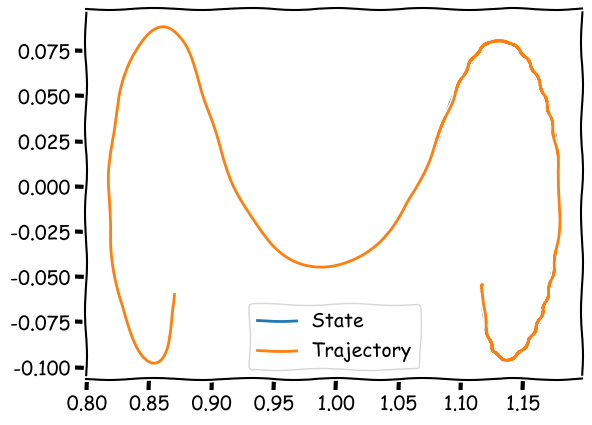

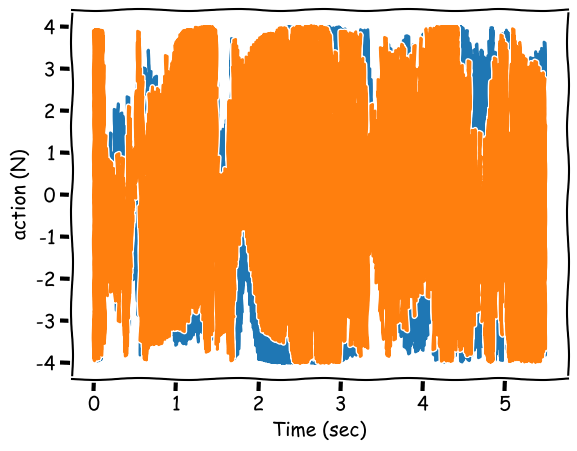

In [44]:
steps_per_epoch_=30000
ac_kwargs = ac_kwargs_td3

td3 = TD3(lambda : ThreeBodyEnv(trajectory, error_range=0.01, final_range=0.001),
          epochs=100, ac_kwargs=ac_kwargs, steps_per_epoch=steps_per_epoch_,
          batch_size=1024, start_steps=5000, update_after=1000, update_every=2000)

td3.load(filepath='model_TD3/')


# test td3 agent (not trained)
td3.test(fun_mode=True, deterministic=True, save_data=False)

# zs_td3.test(fun_mode=True)
td3.env.second_player = False

## SAC

Logging data to /tmp/experiments/1755942500/progress.txt
Saving config:

{
    "ac_kwargs_class":	{
        "hidden_sizes":	[
            64,
            64
        ]
    },
    "actor_critic":	"MLPActorCritic",
    "alpha":	0.2,
    "batch_size":	1024,
    "device_class":	"cpu",
    "env_fn":	"<function <lambda> at 0x166daede0>",
    "epochs":	100,
    "gamma":	0.99,
    "logger_kwargs":	null,
    "lr":	0.001,
    "max_ep_len":	30000,
    "num_test_episodes":	10,
    "num_updates":	10,
    "polyak":	0.995,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed":	0,
    "self":	{
        "<SAC.SAC object at 0x16858f690>":	{
            "ac_kwargs":	{
                "hidden_sizes":	[
                    64,
                    64
                ]
            },
            "actor_critic":	"MLPActorCritic",
            "alpha":	0.2,
            "batch_size":	1024,
            "device":	"cpu",
            "env_fn":	"<function <lambda> at 0x166daede0>",
            "epochs":	100,
    

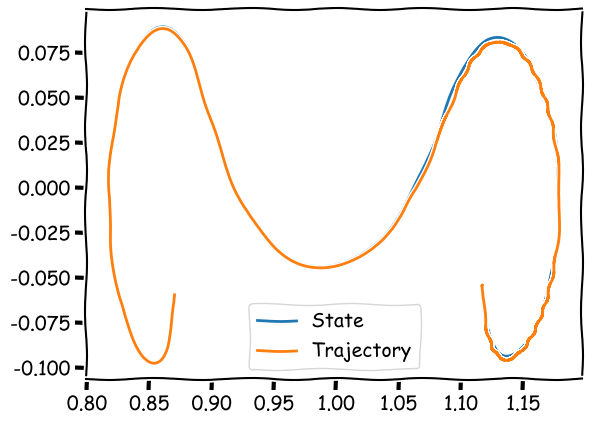

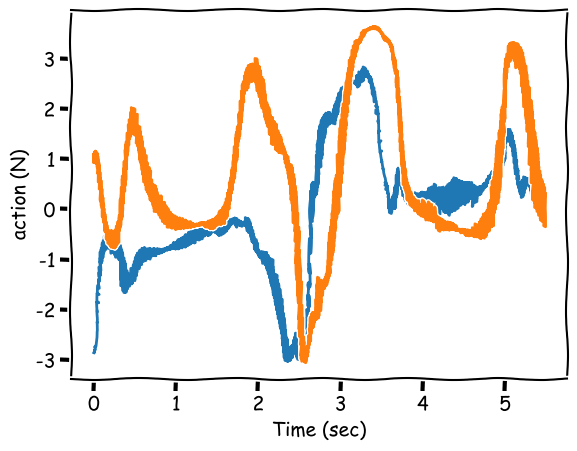

In [45]:
steps_per_epoch_=30000
ac_kwargs = ac_kwargs_sac

sac = SAC(lambda : ThreeBodyEnv(trajectory, error_range=0.01, final_range=0.001),
          epochs=100, device_class=device, ac_kwargs_class=ac_kwargs, steps_per_epoch=steps_per_epoch_,
          batch_size=1024, start_steps=5000, update_after=1000, update_every=2000)


sac.load(filepath='model_SAC/')


# test sac agent (not trained)
sac.test(fun_mode=True, deterministic=True, save_data=False)
sac.env.second_player = False

## PPO

Logging data to /Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/All_in_one/actuator_disturbance/data/PPO_3BP/PPO_3BP_s0/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "clip_ratio":	0.2,
    "env":	{
        "<ThreeBodyEnv instance>":	{
            "action_space":	{
                "Box(-4.0, 4.0, (2,), float32)":	{
                    "_np_random":	null,
                    "_shape":	[
                        2
                    ],
                    "bounded_above":	"[ True  True]",
                    "bounded_below":	"[ True  True]",
                    "dtype":	"float32",
                    "high":	"[4. 4.]",
                    "high_repr":	"4.0",
                    "low":	"[-4. -4.]",
                    "low_repr":	"-4.0"
                }
            },
            "dt":	0.001,
            "error_range":	0.01,
            "final_range":	0.001,
            "max_steps":	600

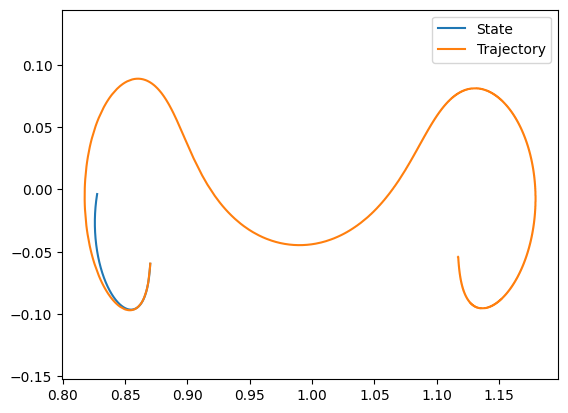

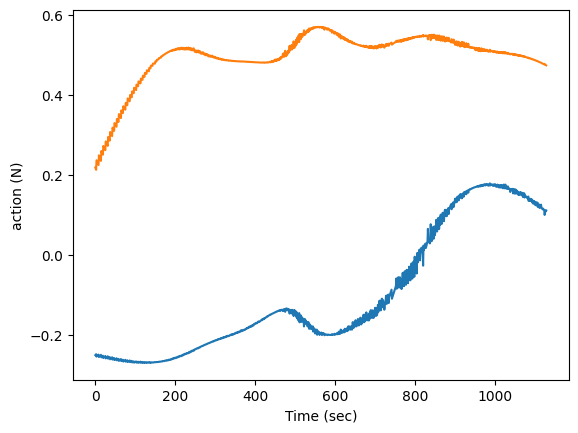

Model loaded successfully and device is cpu! 🥰😎
done 🥺
second player was in the game
(9999, 6)


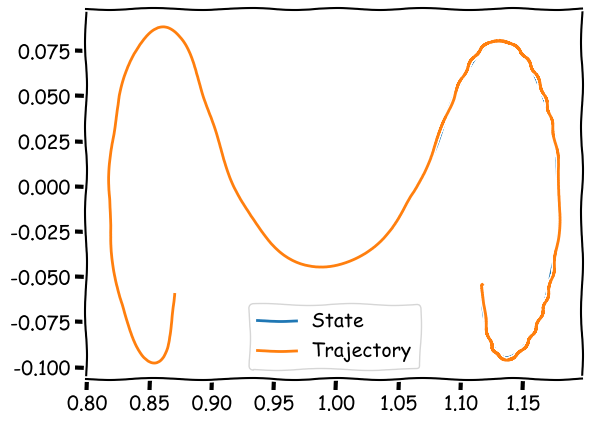

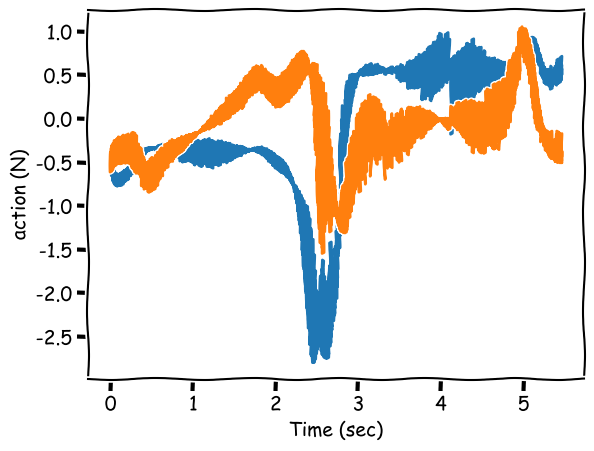

In [46]:
# Define constants
HID = 32
L = 2
GAMMA = 0.99
SEED = 0
STEPS = 30000
EPOCHS = 100
EXP_NAME = 'PPO_3BP'
ac_kwargs = dict(hidden_sizes=[HID] * L)
# Use the constants directly


logger_kwargs = setup_logger_kwargs(EXP_NAME, SEED)

ppo = PPO(ThreeBodyEnv(trajectory, error_range=0.01, final_range=0.001), ac_kwargs=ac_kwargs, gamma=GAMMA,
            seed=SEED, steps_per_epoch=STEPS, logger_kwargs=logger_kwargs)
# test PPO agent (not trained)
ppo.test(deterministic=True)

ppo.load(filepath='model_PPO/')
ppo.test(fun_mode=True)
ppo.env.second_player = False


## Zero-Sum agents (ZS models)

In [47]:
# Zero-Sum DDPG (Zero-Sum model)
zs_ddpg = DG_DDPG(
    env_fn=make_env,
    actor_critic=ZS_MLPActorCritic,
    ac_kwargs_=ac_kwargs_ddpg,
    seed_=seed,
    steps_per_epoch=steps_per_epoch,
    epochs_=epochs,
    logger_kwargs_=logger_kwargs,
    device=device,  # keep signature as in your DG_DDPG
    batch_size=1024,
    start_steps=5000,
    update_after=1000,
    update_every=2000
)

Logging data to /Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/All_in_one/actuator_disturbance/data/PPO_3BP/PPO_3BP_s0/progress.txt
Saving config:

{
    "ac_kwargs_":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "act_dim":	2,
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	1024,
    "device":	"cpu",
    "env_fn":	"make_env",
    "epochs_":	50,
    "exp_name":	"PPO_3BP",
    "first_player_epoch":	50,
    "gamma_":	0.99,
    "logger_kwargs_":	{
        "exp_name":	"PPO_3BP",
        "output_dir":	"/Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/All_in_one/actuator_disturbance/data/PPO_3BP/PPO_3BP_s0"
    },
    "max_ep_len":	6000,
    "num_test_episodes":	10,
    "obs_dim":	[
        4
    ],
    "p":	"Parameter containing:\ntensor([0.1690])",
    "pi_lr":	0.001,
    "polyak":	0.995,
    "q_lr":	0.001,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed_":	0,
    "self":	{

Model loaded successfully and device_ is cpu! 🥰😎
done 🥺
second player was in the game
(9999, 6)


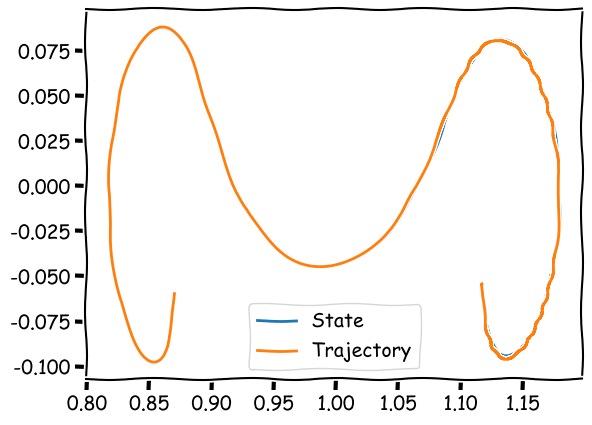

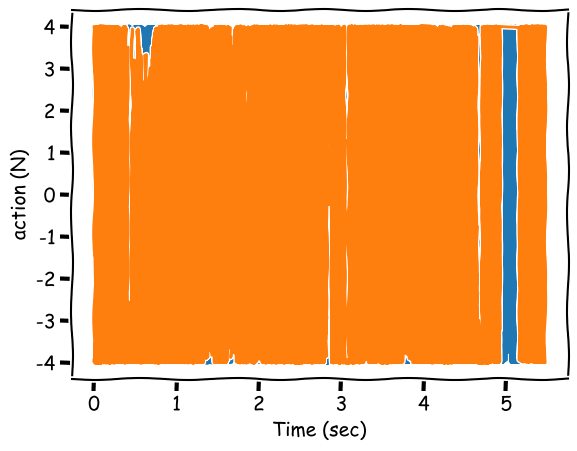

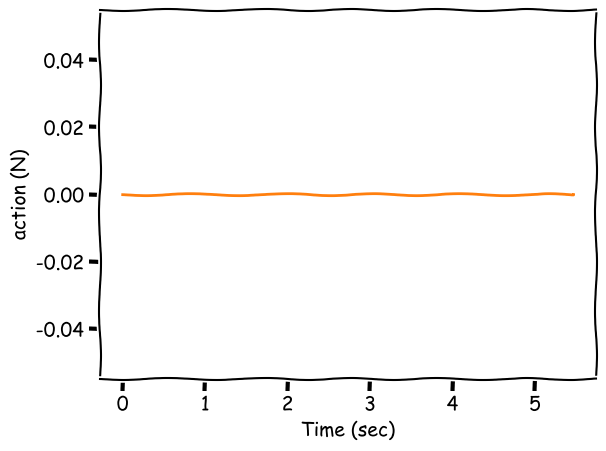

In [48]:
# Adjust path if your folder name differs
zs_ddpg.load(from_device_to_load='cuda', filepath='model_zs_DDPG/')
zs_ddpg.test(fun_mode=True)
zs_ddpg.env.second_player = False

In [49]:
# Zero-Sum TD3
zs_td3 = ZS_TD3(lambda : ThreeBodyEnv(trajectory, error_range=0.01, final_range=0.001),
                epochs=100, ac_kwargs=ac_kwargs_td3, steps_per_epoch=steps_per_epoch_, batch_size=1024,
                start_steps=5000, update_after=1000, update_every=2000)

Logging data to /tmp/experiments/1755942517/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	1024,
    "env_fn":	"<function <lambda> at 0x1672607c0>",
    "epochs":	100,
    "first_player_start_learning_epoch":	20,
    "gamma":	0.99,
    "logger_kwargs":	null,
    "max_ep_len":	30000,
    "noise_clip":	0.5,
    "num_test_episodes":	10,
    "pi_lr":	0.001,
    "policy_delay":	2,
    "polyak":	0.995,
    "q_lr":	0.001,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed":	0,
    "self":	{
        "<Zero_Sum_TD3.ZS_TD3 object at 0x168327350>":	{
            "ac_kwargs":	{
                "hidden_sizes":	[
                    32,
                    32
                ]
            },
            "act_noise":	0.1,
            "actor_critic":	"MLPActorCritic",
            "batch_size":	1024,
            "env_fn":	"<function <lambda> a

Model loaded successfully and device is cpu! 🥰😎
done 🥺
second player was in the game


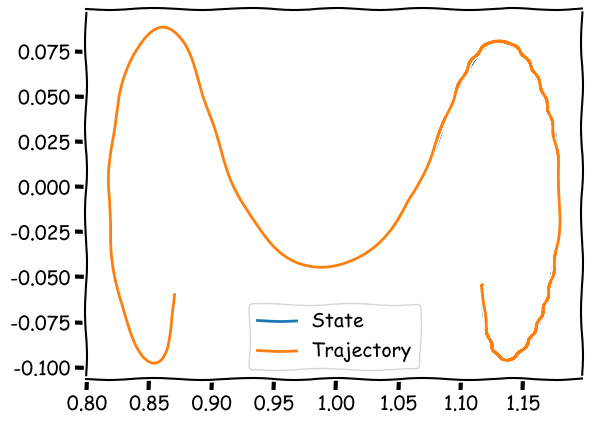

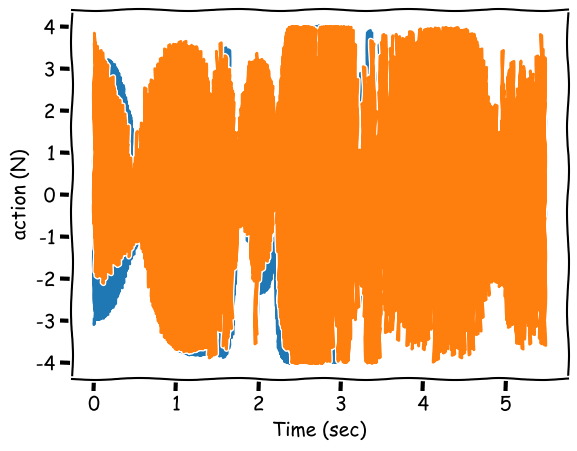

In [50]:
zs_td3.load(filepath='model_zs_TD3/')
zs_td3.test(fun_mode=True, deterministic=True, save_data=False)
zs_td3.env.second_player = False

In [51]:
# Zero-Sum SAC
zs_sac = ZS_SAC(lambda : ThreeBodyEnv(trajectory, error_range=0.01, final_range=0.001),
                epochs=100, device_class=device, ac_kwargs_class=ac_kwargs_sac, steps_per_epoch=steps_per_epoch_,
                batch_size=1024, start_steps=5000, update_after=1000, update_every=2000)

Logging data to /tmp/experiments/1755942529/progress.txt
Saving config:

{
    "ac_kwargs_class":	{
        "hidden_sizes":	[
            64,
            64
        ]
    },
    "actor_critic":	"MLPActorCritic",
    "alpha":	0.2,
    "batch_size":	1024,
    "device_class":	"cpu",
    "env_fn":	"<function <lambda> at 0x167260cc0>",
    "epochs":	100,
    "gamma":	0.99,
    "logger_kwargs":	null,
    "lr":	0.001,
    "max_ep_len":	30000,
    "num_test_episodes":	10,
    "num_updates":	10,
    "polyak":	0.995,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed":	0,
    "self":	{
        "<Zero_Sum_SAC.ZS_SAC object at 0x166d09990>":	{
            "ac_kwargs":	{
                "hidden_sizes":	[
                    64,
                    64
                ]
            },
            "actor_critic":	"MLPActorCritic",
            "alpha":	0.2,
            "batch_size":	1024,
            "device":	"cpu",
            "env_fn":	"<function <lambda> at 0x167260cc0>",
            "epochs

Model loaded successfully and device is cpu! 🥰😎
done 🥺
second player was in the game


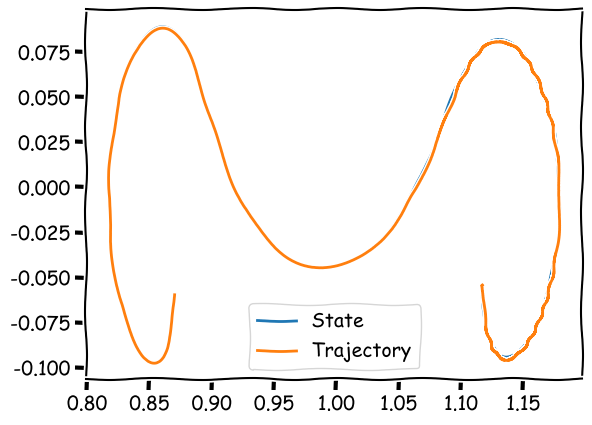

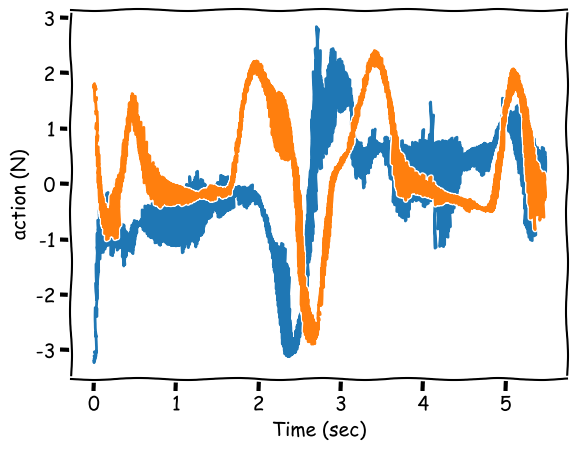

In [52]:
zs_sac.load(filepath='model_zs_SAC/')
zs_sac.test(fun_mode=True, deterministic=True, save_data=False)
zs_sac.env.second_player = False

In [53]:
# Zero-Sum PPO
zs_ppo = ZS_PPO(ThreeBodyEnv(trajectory, error_range=0.01, final_range=0.001),
                ac_kwargs=ac_kwargs_ppo, gamma=GAMMA, seed=SEED, steps_per_epoch=STEPS,
                logger_kwargs=logger_kwargs)

Logging data to /Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/All_in_one/actuator_disturbance/data/PPO_3BP/PPO_3BP_s0/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "clip_ratio":	0.2,
    "env":	{
        "<ThreeBodyEnv instance>":	{
            "action_space":	{
                "Box(-4.0, 4.0, (2,), float32)":	{
                    "_np_random":	null,
                    "_shape":	[
                        2
                    ],
                    "bounded_above":	"[ True  True]",
                    "bounded_below":	"[ True  True]",
                    "dtype":	"float32",
                    "high":	"[4. 4.]",
                    "high_repr":	"4.0",
                    "low":	"[-4. -4.]",
                    "low_repr":	"-4.0"
                }
            },
            "dt":	0.001,
            "error_range":	0.01,
            "final_range":	0.001,
            "max_steps":	600

Model loaded successfully and device is cpu! 🥰😎
done 🥺
second player was in the game
(9999, 6)


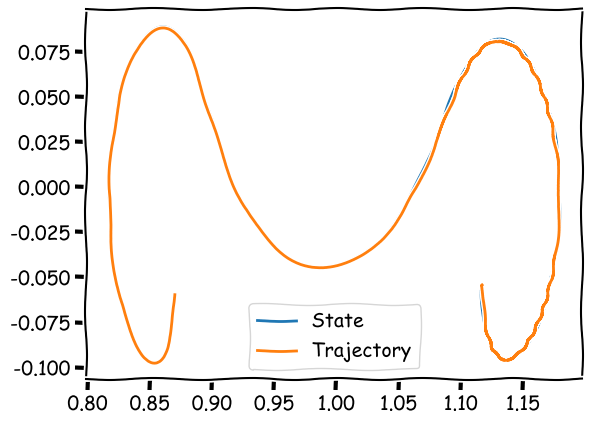

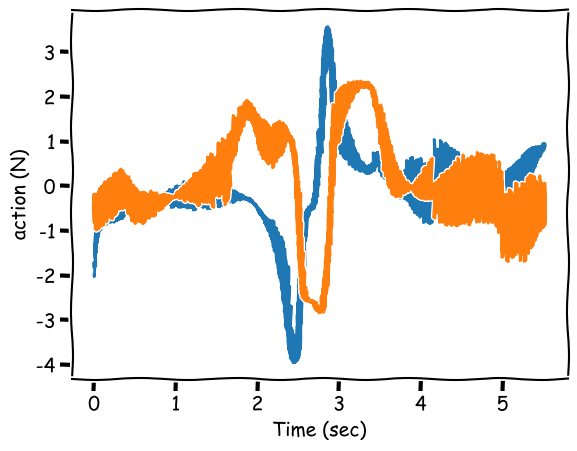

In [54]:
zs_ppo.load(filepath='model_zs_PPO/')
zs_ppo.test(fun_mode=True)
zs_ppo.env.second_player = False


In [55]:
class ActuatorDisturbanceWrapper(gym.Wrapper):
    """
    Gym environment wrapper that adds disturbance and extra noise to the actions taken by the agent.
    This wrapper supports the Gymnasium API where:
      - reset returns: (observation, info)
      - step returns: (observation, reward, terminated, truncated, info)
    """

    def __init__(self, env, disturbance_std=0.05, noise_std=0.02):
        super(ActuatorDisturbanceWrapper, self).__init__(env)
        self.disturbance_std = disturbance_std  # Standard deviation of actuator disturbance
        self.noise_std = noise_std  # Standard deviation of extra noise

    def reset(self, **kwargs):
        result = self.env.reset(**kwargs)
        if isinstance(result, tuple):
            obs, info = result
            return obs, info
        else:
            return result

    def step(self, action):
        # Apply actuator disturbance and extra noise to the action
        action_with_disturbance = self._apply_disturbance(action)
        action_with_noise = self._apply_noise(action_with_disturbance)

        # Execute the action in the environment with added disturbance and noise
        obs, reward, terminated, truncated, info = self.env.step(action_with_noise)
        return obs, reward, terminated, truncated, info

    def _apply_disturbance(self, action):
        """
        Applies Gaussian noise to the action to simulate actuator disturbance.
        """
        action = np.array(action)
        disturbance = np.random.normal(0, self.disturbance_std, size=action.shape)
        return np.clip(action + disturbance, self.env.action_space.low, self.env.action_space.high)

    def _apply_noise(self, action):
        """
        Applies additional random noise to the action and clips to bounds.
        """
        noise = np.random.normal(0, self.noise_std, size=action.shape) * action
        return np.clip(action + noise, self.env.action_space.low, self.env.action_space.high)

def make_env_actuator_disturbance_with_noise(error_range=0.01, final_range=0.001, disturbance_std=0.05, noise_std=0.02):
    """
    Creates the ThreeBodyEnv wrapped with both actuator disturbance and extra noise.
    """
    env = ThreeBodyEnv(trajectory, error_range=error_range, final_range=final_range)
    return ActuatorDisturbanceWrapper(env, disturbance_std=disturbance_std, noise_std=noise_std)


In [56]:
def run_episode(agent, env_fn, max_steps=10000, deterministic=True, agent_no="ddpg"):
    """
    Run one episode using the given agent and environment function.
    Adapted for Gymnasium (reset returns (obs, info) and step returns five outputs).

    Args:
        agent: The RL agent with an action selection method
        env_fn: Function that creates the environment
        max_steps: Maximum steps per episode
        deterministic: Whether to use deterministic action selection

    Returns:
        total_reward: Sum of rewards collected in the episode.
    """
    env = env_fn()

    obs, _ = env.reset()  # Gymnasium reset returns (obs, info)
    total_reward = 0.0
    steps = 0
    done = False
    env.second_player = False

    while not done and steps < max_steps:
        # Select action based on agent type
        if agent_no == "ddpg":
            action = agent.get_action(obs, 0)
        elif agent_no == "td3":
            action = agent.ac.act(torch.as_tensor(obs, dtype=torch.float32))
        elif agent_no == "sac":
            action = agent.ac.act(torch.as_tensor(obs, dtype=torch.float32, device=device), deterministic=True)
        elif agent_no == "ppo":
            action, _, _ = agent.ac.step(torch.as_tensor(obs, dtype=torch.float32), deterministic=True)
        # Zero-Sum variants (ZS models)
        elif agent_no == "zs_ddpg":
            action = agent.get_action(obs, 0)
        elif agent_no == "zs_td3":
            action = agent.ac.act(torch.as_tensor(obs, dtype=torch.float32))
        elif agent_no == "zs_sac":
            action = agent.ac.act(torch.as_tensor(obs, dtype=torch.float32, device=device), deterministic=True)
        elif agent_no == "zs_ppo":
            action, _, _ = agent.ac.step(torch.as_tensor(obs, dtype=torch.float32), deterministic=True)
        else:
            raise ValueError(f"Unknown agent type: {agent_no}")
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated  # Determine if the episode is done
        total_reward += reward
        steps += 1

    env.close()
    return total_reward


def evaluate_agent(agent, env_fn, num_episodes=20, max_steps=10000, deterministic=True, agent_name=""):
    """
    Evaluate the agent over multiple episodes and collect cumulative rewards.

    Args:
        agent: The RL agent to evaluate
        env_fn: Function that creates the environment
        num_episodes: Number of episodes to run
        max_steps: Maximum steps per episode
        deterministic: Whether to use deterministic action selection
        agent_name: Name of the agent for logging purposes

    Returns:
        returns: List of cumulative rewards from each episode.
    """
    returns = []
    for i in range(num_episodes):
        ret = run_episode(agent, env_fn, max_steps, deterministic=deterministic, agent_no=agent_name)
        returns.append(ret)
        print(f"{agent_name}: Episode {i+1}/{num_episodes}, Return: {ret:.2f}")
    return returns


In [69]:
# Use one disturbed env creator for all evaluations
disturbance_std = 0.8
noise_std = 0.1
num_episodes = 10

disturbed_env_fn = lambda: make_env_actuator_disturbance_with_noise(
    disturbance_std=disturbance_std, noise_std=noise_std
)

# Evaluate Standard models
returns_ddpg = evaluate_agent(ddpg, disturbed_env_fn, num_episodes=num_episodes, agent_name="ddpg")
returns_td3 = evaluate_agent(td3, disturbed_env_fn, num_episodes=num_episodes, agent_name="td3")
returns_sac = evaluate_agent(sac, disturbed_env_fn, num_episodes=num_episodes, agent_name="sac")
returns_ppo = evaluate_agent(ppo, disturbed_env_fn, num_episodes=num_episodes, agent_name="ppo")

# Evaluate Zero-Sum (ZS) models
returns_zs_ddpg = evaluate_agent(zs_ddpg, disturbed_env_fn, num_episodes=num_episodes, agent_name="zs_ddpg")
returns_zs_td3 = evaluate_agent(zs_td3, disturbed_env_fn, num_episodes=num_episodes, agent_name="zs_td3")
returns_zs_sac = evaluate_agent(zs_sac, disturbed_env_fn, num_episodes=num_episodes, agent_name="zs_sac")
returns_zs_ppo = evaluate_agent(zs_ppo, disturbed_env_fn, num_episodes=num_episodes, agent_name="zs_ppo")


done 🥺
second player was in the game
ddpg: Episode 1/10, Return: -373.59
done 🥺
second player was in the game
ddpg: Episode 2/10, Return: -397.44
done 🥺
second player was in the game
ddpg: Episode 3/10, Return: -315.94
done 🥺
second player was in the game
ddpg: Episode 4/10, Return: -380.50
done 🥺
second player was in the game
ddpg: Episode 5/10, Return: -376.55
done 🥺
second player was in the game
ddpg: Episode 6/10, Return: -387.29
done 🥺
second player was in the game
ddpg: Episode 7/10, Return: -376.39
done 🥺
second player was in the game
ddpg: Episode 8/10, Return: -375.02
done 🥺
second player was in the game
ddpg: Episode 9/10, Return: -375.11
done 🥺
second player was in the game
ddpg: Episode 10/10, Return: -383.58
done 🥺
second player was in the game
td3: Episode 1/10, Return: 548.50
done 🥺
second player was in the game
td3: Episode 2/10, Return: 565.87
done 🥺
second player was in the game
td3: Episode 3/10, Return: 550.30
done 🥺
second player was in the game
td3: Episode 4/10, 

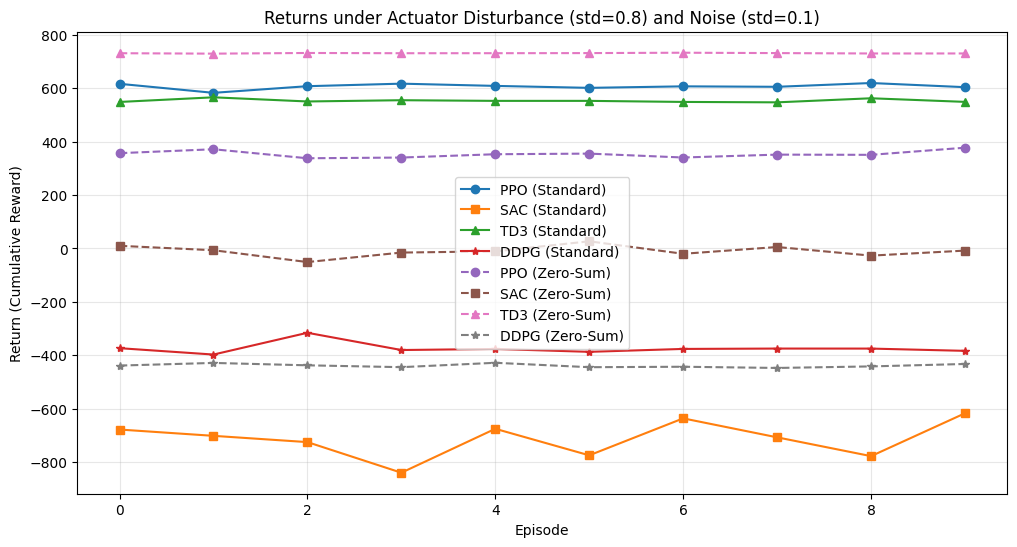

In [70]:
# labels
returns_ppo_label = "PPO (Standard)"
returns_sac_label = "SAC (Standard)"
returns_td3_label = "TD3 (Standard)"
returns_ddpg_label = "DDPG (Standard)"

returns_zs_ppo_label = "PPO (Zero-Sum)"
returns_zs_sac_label = "SAC (Zero-Sum)"
returns_zs_td3_label = "TD3 (Zero-Sum)"
returns_zs_ddpg_label = "DDPG (Zero-Sum)"

# Plot the returns for visual comparison (Standard vs Zero-Sum)
plt.figure(figsize=(12, 6))
plt.plot(returns_ppo, marker='o', label=returns_ppo_label)
plt.plot(returns_sac, marker='s', label=returns_sac_label)
plt.plot(returns_td3, marker='^', label=returns_td3_label)
plt.plot(returns_ddpg, marker='*', label=returns_ddpg_label)

plt.plot(returns_zs_ppo, marker='o', linestyle='--', label=returns_zs_ppo_label)
plt.plot(returns_zs_sac, marker='s', linestyle='--', label=returns_zs_sac_label)
plt.plot(returns_zs_td3, marker='^', linestyle='--', label=returns_zs_td3_label)
plt.plot(returns_zs_ddpg, marker='*', linestyle='--', label=returns_zs_ddpg_label)

plt.xlabel('Episode')
plt.ylabel('Return (Cumulative Reward)')
plt.title(f'Returns under Actuator Disturbance (std={disturbance_std}) and Noise (std={noise_std})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


/var/folders/cf/x6zpxdwn2dg40q0c0r418f7c0000gp/T/ipykernel_1857/2263962601.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, labels=labels, patch_artist=True)


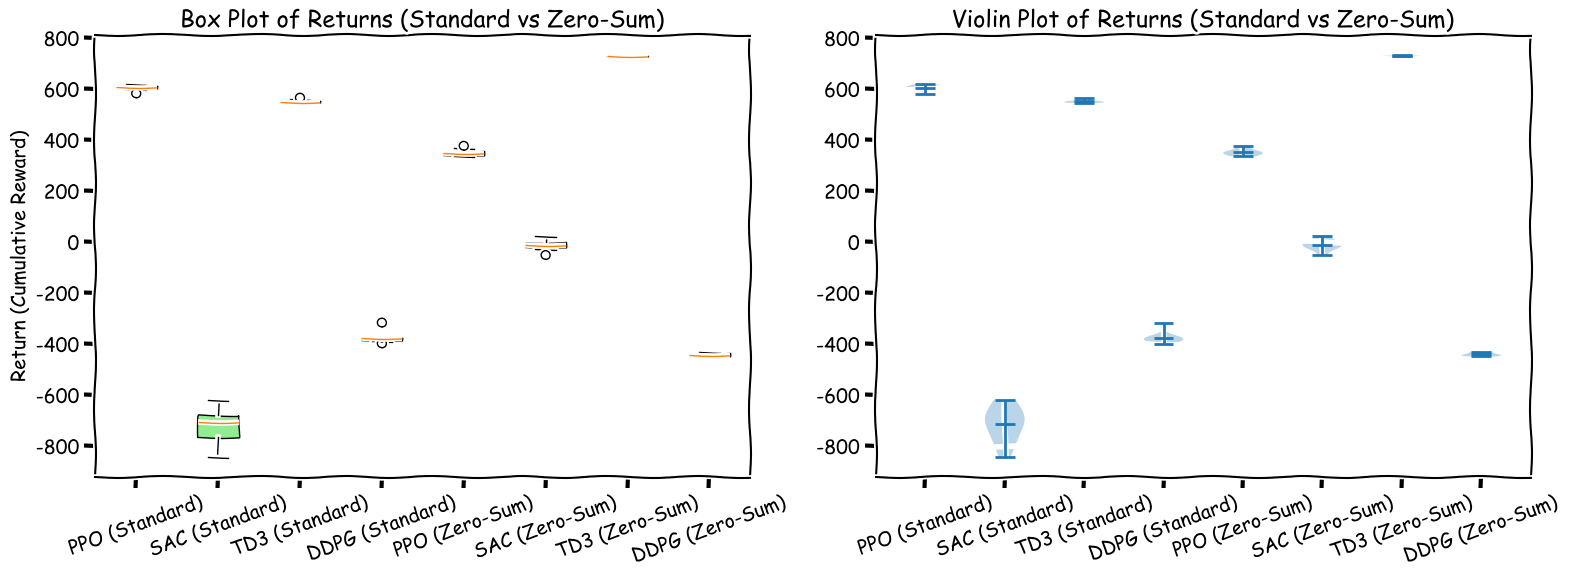

In [71]:
# Create box and violin plots for all algorithms
data = [
    returns_ppo, returns_sac, returns_td3, returns_ddpg,
    returns_zs_ppo, returns_zs_sac, returns_zs_td3, returns_zs_ddpg
]
labels = [
    returns_ppo_label, returns_sac_label, returns_td3_label, returns_ddpg_label,
    returns_zs_ppo_label, returns_zs_sac_label, returns_zs_td3_label, returns_zs_ddpg_label
]

with plt.xkcd():
    plt.figure(figsize=(16, 6))

    # Box Plot
    plt.subplot(1, 2, 1)
    box = plt.boxplot(data, labels=labels, patch_artist=True)
    colors = ['lightblue','lightgreen','lightpink','lightsalmon','lightskyblue','palegreen','plum','peachpuff']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.title('Box Plot of Returns (Standard vs Zero-Sum)')
    plt.ylabel('Return (Cumulative Reward)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=20)

    # Violin Plot
    plt.subplot(1, 2, 2)
    violin = plt.violinplot(data, showmeans=True)
    plt.xticks(range(1, len(labels)+1), labels, rotation=20)
    plt.title('Violin Plot of Returns (Standard vs Zero-Sum)')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


In [72]:
# Create a DataFrame with all results
df = pd.DataFrame({
    returns_ppo_label: returns_ppo,
    returns_sac_label: returns_sac,
    returns_td3_label: returns_td3,
    returns_ddpg_label: returns_ddpg,
    returns_zs_ppo_label: returns_zs_ppo,
    returns_zs_sac_label: returns_zs_sac,
    returns_zs_td3_label: returns_zs_td3,
    returns_zs_ddpg_label: returns_zs_ddpg
})

# Display the head of the dataframe
df.head()


,PPO (Standard),SAC (Standard),TD3 (Standard),DDPG (Standard),PPO (Zero-Sum),SAC (Zero-Sum),TD3 (Zero-Sum),DDPG (Zero-Sum)
0,616.377292,-678.259083,548.497357,-373.593051,356.708800,9.756475,730.982167,-438.715476
1,582.638982,-701.868303,565.865058,-397.444287,371.350327,-6.811168,729.376005,-428.812570
2,607.490633,-725.351479,550.301405,-315.942133,337.611860,-51.101022,731.894244,-437.765368
3,616.988548,-839.983155,555.002475,-380.503505,340.311000,-15.560596,730.968603,-444.701895
4,608.615930,-675.479094,552.519801,-376.552841,352.708937,-10.904526,731.057986,-428.322106


In [73]:
# Calculate summary statistics
summary = df.describe()
print("Summary Statistics:")
print(summary)


Summary Statistics:
       PPO (Standard)  SAC (Standard)  TD3 (Standard)  DDPG (Standard)  \
count       10.000000       10.000000       10.000000        10.000000   
mean       606.875658     -713.487250      553.135247      -374.142880   
std         10.453640       68.391117        6.294767        21.719177   
min        582.638982     -839.983155      547.026505      -397.444287   
25%        604.178416     -762.483804      548.614944      -382.814348   
50%        607.207630     -704.669296      551.410603      -376.473864   
75%        614.436951     -676.174092      554.389096      -375.040411   
max        619.391993     -617.317927      565.865058      -315.942133   

       PPO (Zero-Sum)  SAC (Zero-Sum)  TD3 (Zero-Sum)  DDPG (Zero-Sum)  
count       10.000000       10.000000       10.000000        10.000000  
mean       353.300643       -9.803795      731.018248      -438.851302  
std         12.921494       21.315565        1.002121         6.865907  
min        337.611860

In [74]:
# Save results to CSV with timestamp to avoid overwriting
from datetime import datetime
filename = 'evaluation_returns.csv'
df.to_csv(filename, index=False)
print(f"Results saved to {filename}")

# Also save a parameter summary for reference


Results saved to evaluation_returns.csv
